In this notebook, we use an altered dataset about students' achievements in the Portuguese language to demonstrate 3 strategies of missing values. You can read the explanation of the features [here](https://archive.ics.uci.edu/ml/datasets/student+performance).

Firstly, let's import necessary libraries, load the data, and print few rows:

In [ ]:
# Import pandas, numpy, seaborn and matplotlib libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the data
data = pd.read_csv('portuguese_students.csv', sep = ';')
# Printing the first 5 rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,NaN,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,NaN,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Four features contain missing values, namely 'age', 'higher', 'internet' and 'romantic'.

In [ ]:
# Checking for missing values
data.isnull().sum()

school          0
sex             0
age             2
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher         28
internet        5
romantic      101
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

Let's make use of `Seaborn's heatmap` and visualize missing data. We set parameter `cbar = False` since we don't need to draw the color bar.

Such a visualization has a benefit that people usually do not realize. Printing amounts of missing values in the dataset has its limitations. Remember that descriptive statistics might reveal less than what visualization does. You might be able to spot, for example, **that missing values in two columns have similar or identical patterns**. 

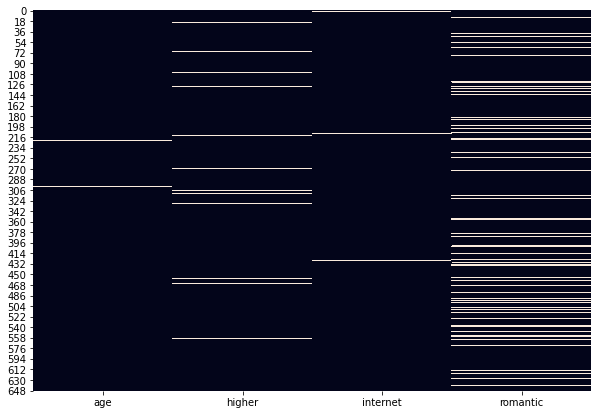

In [ ]:
# Visualize only those three columns that contain missing values
plt.figure(figsize = (10,7))
data_copy = data[['age','higher','internet','romantic']]
sns.heatmap(data_copy.isnull(), cbar = False);

# 1. Strategies of missing values

Let's take a closer look at missing data and try to detect the strategy of the missingness.

- potrebujem skonzultovat strategie a priklady 

## 1.1 MCAR

We already know that 'internet' feature contains 5 missing values out of 649 observations overall. Let´s try to find out why we might miss this information. Take a look at particular rows below. Can you spot any pattern? 

We can see that 3 students are attending Gabriel Pereira (GP) school and 2 students from Mousinho da Silveira (MS) school. We actually can't see a pattern considering the gender of students; the presence of females and males is quite balanced. There is also a wide range of students' age from 15 to 19. This is the same case regarding their final grade.





In [ ]:
# Filtering only those rows that contain NaN
internet_na = data[data['internet'].isnull()]
# Displaying 
internet_na[['internet', 'school', 'sex', 'age','G3','activities','absences']]

,internet,school,sex,age,G3,activities,absences
2,NaN,GP,F,15.0,12,no,6
211,NaN,GP,M,16.0,12,yes,16
409,NaN,GP,M,18.0,15,yes,9
427,NaN,MS,F,16.0,17,no,0
571,NaN,MS,M,19.0,9,yes,4


In conclusion, we can't tell there is an obvious pattern related to the missingness in 'internet' feature. This case might be the first concept, and so that **the data is missing completely at random** (MCAR). These 5 students could have accidentally skipped this particular question about internet access. Theoretically, the missingness could have been caused by a person responsible for data recording into a file and making a mistake. There can be many reasons why we miss this information. 

The data may also be **missing NOT at random** (MNAR), since there can be an underlying pattern we can not really see. 

Now let's discuss 'age' feature where we miss the information about age for 2 students. These 2 students are from the same school called Gabriel Pereira and share similar responses to some questions. At first glance, we can not conclude what the strategy of missing values is. There is no obvious pattern or anything we can use to explain the missingness. Again, it could be the case that values are **missing NOT at random**. 

In [ ]:
# Missing values in 'age' feature
data[data['age'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
222,GP,F,NaN,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13
301,GP,M,NaN,U,GT3,T,4,3,teacher,other,course,mother,1,2,0,no,yes,no,no,no,yes,yes,no,4,3,2,1,1,3,2,10,10,11


# 1.2 MAR

The categorical feature 'romantic' contains 101 missing values. Let's take a closer look at this feature by computing the proportion. We can see that only 21% of females and 31% of males reported a romantic relationship:

In [ ]:
# The percentage of students 
pd.crosstab(data.sex, data.romantic, normalize = 'index').round(2)

romantic,no,yes
sex,,
F,0.79,0.21
M,0.69,0.31


We'd like to see how many males and females did not provide any information about a romantic relationship. If we filter the data based on 'sex' feature, we can see only 2 missing records for male students. What do you think the strategy of the missingness is? Do you see any pattern that could reveal why we miss this information?

In [ ]:
# Male students 
data.loc[(data.sex == 'M') & (data.romantic.isnull())]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
13,GP,M,15.0,U,GT3,T,4,3,teacher,other,course,mother,2,2,0,no,yes,no,no,yes,yes,yes,NaN,5,4,3,1,2,3,0,12,12,13
640,MS,M,18.0,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,NaN,5,4,3,4,3,3,0,7,7,0


We miss information about the relationship for 99 female students. 

In [ ]:
# Female students
data.loc[(data.sex == 'F') & (data.romantic.isnull())]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,NaN,3,2,2,1,1,5,0,14,14,14
40,GP,F,16.0,U,LE3,T,2,2,other,other,home,mother,2,2,0,no,yes,no,yes,no,yes,yes,NaN,3,3,3,1,2,3,16,11,11,10
45,GP,F,15.0,U,LE3,A,4,3,other,other,course,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,NaN,5,2,2,1,1,5,4,10,11,11
55,GP,F,16.0,U,GT3,A,2,1,other,other,other,mother,1,2,0,no,no,no,yes,yes,yes,yes,NaN,5,3,4,1,1,2,2,12,13,12
61,GP,F,16.0,U,GT3,T,1,1,services,services,course,father,4,1,0,yes,yes,no,yes,no,yes,yes,NaN,5,5,5,5,5,5,0,10,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,MS,F,17.0,R,LE3,A,2,1,services,other,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,NaN,5,3,3,1,2,2,5,11,11,12
615,MS,F,17.0,U,LE3,A,3,2,services,other,reputation,mother,2,2,0,no,no,no,no,yes,yes,no,NaN,1,2,3,1,2,5,0,15,14,15
620,MS,F,17.0,U,LE3,T,4,4,at_home,at_home,course,mother,1,2,0,no,yes,no,yes,yes,yes,yes,NaN,2,3,4,1,1,1,4,15,14,15
624,MS,F,17.0,R,GT3,T,1,1,other,services,reputation,mother,3,1,1,no,yes,no,no,yes,yes,yes,NaN,5,2,1,1,2,1,0,8,8,9


Let's take into consideration the age of females that ranges from 15 to 21:

In [ ]:
# Minimum and maximum values of 'age' feature
print(data.loc[data.sex == 'F'].age.min())
print(data.loc[data.sex == 'F'].age.max())

15.0
21.0


Are younger students less likely to respond to question about a romantic relationship? We set an age threshold, let's say at 17 years. There are 96 missing values for females whose age is 17 or less. And only 3 missing values for older students. 

In [ ]:
# Females: older than 17 years
data.loc[(data.sex == 'F') & (data.age > 17)].romantic.isnull().sum()

3

In [ ]:
# Females: less than or equal to 17 years
data.loc[(data.sex == 'F') & (data.age <= 17)].romantic.isnull().sum()

96

These findings could support our theory that younger students are less likely to respond to sensitive questions about relationships. That could be a pattern that explains the missingness within our data. In that case, it would be the second strategy, so that the data is **missing at random**. 

## 1.3 MNAR

Finally, there is 'higher' feature containing information about whether the students plan to take higher education. We miss this information for 23 observations. Let's see whether we can spot any pattern that could reveal the cause of the missingness.

When filtering the data based on gender, we can see that there are more females for which we miss the information about higher education compared to males:

In [ ]:
# Missing values in 'higher' feature for females
females = data.loc[(data.sex == 'F') & (data.higher.isnull())]
len(females)

18

In [ ]:
# Missing values in 'higher' feature for males
males = data.loc[(data.sex == 'M') & (data.higher.isnull())]
len(males)

10

Can we infer something from available data? At first, let's consider social-related features that could have caused the missingness. 

The average age of students is the same for females and males, around 15-16 years. One assumption could be that these young people didn't know what school to choose or decide whether to continue studying and left this question blank. But we can not prove it. 

In [ ]:
# Average age
print('Average age of females: ', females.age.mean())
print('Average age of males: ', males.age.mean())

Average age of females:  16.555555555555557
Average age of males:  15.6


Do family members support students in their education? Let's look at two features: 'famsup' (family educational support) and 'famrel' (quality of family relationships). The male students reported very good relations with family members. Even those who do not receive educational support. There are similar findings also for females.



In [ ]:
# Family support and relations for females
males[['famsup','famrel']]

,famsup,famrel
20,no,4
21,yes,5
71,no,3
102,yes,5
121,yes,5
191,no,4
270,no,5
276,no,4
466,yes,3
560,yes,4


What about the education of parents? Could we assume that parents' education somehow influences their children's achievements and decision to take a higher education? If yes, we could expect, for example, that students whose parents have low education levels do not want to take higher education. 

Before we take a look at the data, let's change education levels from integers to string values for better readability:






In [ ]:
mapping_val = {0:'none',1:'4th grade',2:'5th-9th grade',3:'secondary',4:'higer'}
males[['Fedu','Medu']] = males[['Fedu','Medu']].replace(mapping_val)
females[['Fedu','Medu']] = females[['Fedu','Medu']].replace(mapping_val)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


There are some students whose parents have higher education and parents with lower education (4th grade or 5th-9th grade). When we look at the 'Medu' feature, we can see the predominance of mothers with better education. According to 'Fedu' column, only 3 fathers have a higher education.

In [ ]:
# Male students
males[['Fedu','Medu']]

,Fedu,Medu
20,secondary,higer
21,higer,higer
71,5th-9th grade,higer
102,higer,higer
121,5th-9th grade,5th-9th grade
191,secondary,secondary
270,higer,higer
276,4th grade,5th-9th grade
466,4th grade,secondary
560,4th grade,4th grade


What about female students? Below we can see that less-educated parents dominate over parents with a high level of education. But could it cause the missingness? Can we assume that?

In [ ]:
# Female students
females[['Fedu','Medu']]

,Fedu,Medu
87,5th-9th grade,higer
99,secondary,higer
106,5th-9th grade,5th-9th grade
130,higer,secondary
160,5th-9th grade,4th grade
214,secondary,higer
252,4th grade,higer
308,higer,higer
313,4th grade,4th grade
330,4th grade,5th-9th grade


Missing values in 'higher' feature probably require in-depth exploration, but they can belong to MNAR. In that case, we wouldn't recognize any pattern related to the missingness. 

#2. Handling missing data with scikit-learn

In Data preprocessing lecture, you learned how to handle missing data using basic approaches. One of them was removing all observations that contain NaN. The other was replacing missing data with a scalar value, mean value, backward method, etc. Or with a string value in the case of categorical columns. All of these transformations are `stateless`. They are sufficient if you intend to use the data for a simple analysis. 

However, remember what we discussed. As soon as you want to build a robust pipeline, for example, for Machine Learning, you need to save the state.

Luckily, scikit-learn offers a handy alternative called **Simple imputer** that can save the state. Additionally, we can retain the information that there was a missing value using **Missing indicator**. Since these two are **stateful** transformations, we can easily make those parts of our robust pipeline. 

##2.1 Missing Indicator

**Before we impute missing values** we want to mark all of them. In essence, the idea behind the missing indicator is that we **preserve extra information** for our model, which is that the value was missing. We hope that the model might pick up a pattern that we might overlook when exploring the data. 

`MissingIndicator` creates binary variables indicating the presence of missing values. You can read more in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator).

Remember, `Missing Indicator` or any other transformer from `scikit-learn` library can only see the training subset and learn the state from it. Therefore we ALWAYS need to split the dataset into training and holdout sets before performing feature engineering. 

To do that we use `train_test_split()`. You can read more in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Firstly, let's import this method from `model_selection` module:









In [ ]:
# Importing
from sklearn.model_selection import train_test_split

This method randomly split the data into a training set (X_train, y_train) and holdout set (X_test, y_test). We need to specify input data: the features and the target (G3). Using the `test_size` parameter, we specify the proportion of the data in the holdout set. Meaning, holdout set will contain 30% of the data. I also specify  `random_state` parameter for the reproducible result.

In [ ]:
# Split the data into training and testing set
X = data.drop('G3', axis = 1)
y = data.G3

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42) 

In [ ]:
# TASKS >>> Examine new variables that we created using train_test_split() method
#       >>> Print training set and holdout set - notice that they are DataFrames 
#       >>> Print target feature - notice that it's a Series

At first, we need to import `Missing indicator` from `impute` module:

In [ ]:
# Importing
from sklearn.impute import MissingIndicator

Then we create a missing indicator object and store it in 'missing_indicator' variable. `Missing indicator` will create binary variables only for those features that contain NaN defined as `np.nan` by default. Since this is exactly what we need, we'll go with default settings. There are also other options about which you can read in the documentation.

> NOTE: Generally, you don't need to write default arguments explicitly. However, it's a good practice :) 

In [ ]:
# Creating object
missing_indicator = MissingIndicator(missing_values = np.nan, features = 'missing-only')

Next, we call `fit()` method on the training set and select only the 'internet' feature. At this point, our missing indicator is learning where a missing value is present.

In [ ]:
# Fit missing_indicator on 'internet' feature of training set
missing_indicator.fit(X_train[['internet']])

MissingIndicator(error_on_new=True, features='missing-only', missing_values=nan,
                 sparse='auto')

Finally, we can call `transform()` method that creates binary variables and store the result in 'train_transformed' variable:

In [ ]:
# Transforming 'internet' feature of training set
train_transformed = missing_indicator.transform(X_train[['internet']])
train_transformed[:5]

array([[False],
       [ True],
       [False],
       [False],
       [False]])

Now let's compare the original data and transformed values side by side by concatenating them. Below, you can see a new binary variable called 'Missing?' containing False and True values based on a missing value.

In [ ]:
# Concatenated training data and transformed data
# Note that we need to reset the index of original training set and transform output array to a DataFrame 
concatenated_sets = pd.concat([X_train.internet.reset_index(), 
                               pd.DataFrame(train_transformed, 
                                            columns = ['Missing?'])], axis = 1)
# Inspect the first 5 rows
concatenated_sets.head()

,index,internet,Missing?
0,579,yes,False
1,211,NaN,True
2,9,yes,False
3,612,yes,False
4,299,yes,False


Now it's your turn to practice `MissingIndicator()` and mark the presence of NaN in the training set.

In [ ]:
# TASK 1A >>> Create a missing indicator object and store it in 'indicator' variable
indicator = MissingIndicator()

In [ ]:
# TASK 1B >>> Fit 'indicator' on training set (X_train)
indicator.fit(X_train)

MissingIndicator(error_on_new=True, features='missing-only', missing_values=nan,
                 sparse='auto')

In [ ]:
# TASK 1C >>> Transform training set and store the result in 'training_set' variable
#         >>> Examine the output
training_set = indicator.transform(X_train)
training_set

array([[False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       ...,
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False]])

Before you concatenate the created binary variables to the original training set, we generate labels for binary variables and store them in 'var_names':

In [ ]:
# Run this code 
# Create new column names for boolean variables
# Create an empty list to store new names
var_names = []
# Iterate over the features with missing values
for col in X_train[['age','higher','internet','romantic']]:
    label = 'Missing_' + col
    # Append new names to the indicator_name list
    var_names.append(label)

In [ ]:
# TASK 1D >>> Concatenate original training set with created binary variables in the same way like we did above
#         >>> Set 'var_names' as column labels for binary variables
training_set = pd.concat([X_train.reset_index(), 
                          pd.DataFrame(training_set, columns = var_names)],
                         axis = 1)
# >>> Examine the output
training_set.head()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Missing_age,Missing_higher,Missing_internet,Missing_romantic
0,579,MS,M,18.0,U,LE3,T,1,3,at_home,services,course,mother,1,1,0,no,no,no,no,yes,no,yes,yes,4,3,3,2,3,3,0,9,10,False,False,False,False
1,211,GP,M,16.0,R,LE3,T,3,3,teacher,other,home,father,3,1,0,no,yes,no,yes,yes,yes,NaN,no,3,3,4,3,5,3,16,10,11,False,False,True,False
2,9,GP,M,15.0,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,False,False,False,False
3,612,MS,M,17.0,R,GT3,T,4,3,services,other,home,mother,2,2,1,no,yes,yes,yes,no,yes,yes,yes,4,5,5,1,3,2,4,10,11,False,False,False,False
4,299,GP,F,20.0,R,GT3,T,2,1,other,other,course,other,2,2,0,no,yes,yes,yes,yes,no,yes,yes,1,2,3,1,2,2,8,10,12,False,False,False,False


In [ ]:
# TASK 1E >>> Transform also holdout set and store the output in 'holdout_set' variable
holdout_set = indicator.transform(X_test)
#         >>> Concatenate original holdout set with created binary variables and examine the output
holdout_set = pd.concat([X_test.reset_index(), 
                         pd.DataFrame(holdout_set, columns = var_names)],
                        axis = 1)
holdout_set.head()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Missing_age,Missing_higher,Missing_internet,Missing_romantic
0,636,MS,M,18.0,U,GT3,T,4,4,teacher,teacher,home,father,1,2,0,no,no,no,yes,no,yes,yes,no,3,2,4,1,4,2,4,17,18,False,False,False,False
1,220,GP,F,16.0,U,GT3,A,3,1,services,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,3,3,2,2,4,2,11,11,False,False,False,False
2,594,MS,F,18.0,U,GT3,T,4,4,teacher,teacher,reputation,mother,2,2,0,no,no,no,yes,no,yes,yes,no,4,3,5,1,2,1,0,18,18,False,False,False,False
3,429,MS,M,16.0,R,LE3,A,4,4,at_home,other,home,mother,1,2,0,no,yes,no,no,yes,yes,no,no,5,3,2,1,3,2,5,10,11,False,False,False,False
4,72,GP,F,15.0,R,GT3,T,1,1,other,other,reputation,mother,1,2,0,yes,yes,no,no,no,yes,yes,yes,3,3,4,2,4,5,2,13,11,False,False,False,False


##2.2 Simple Imputer

Now you learn how to impute missing values using `SimpleImputer()` from `scikit-learn`. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) where you can read more about this transformer and now let's import it.


In [ ]:
# Importing
from sklearn.impute import SimpleImputer

At first, we replace 2 missing values in 'age' feature with an average age. We only need to specify parameter `strategy = 'mean'`:

In [ ]:
# Create SimpleImputer object for imputing missing values with mean strategy
imputer = SimpleImputer(strategy = 'mean')

Again, we fit `SimpleImputer` only on training data and select 'age' feature. During fitting, it will learn and remember the mean value:

In [ ]:
# Fitting SimpleImputer on 'age'
imputer.fit(training_set[['age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

We can also examine the learned value using `statistics_` attribute:

In [ ]:
# Missing values will be filled in with this value:
imputer.statistics_

array([16.76548673])

Next, we call `transform()` method on 'age' and let the imputer filled missing values in with the mean value:

In [ ]:
# Transforming 'age' of training set
training_set['age'] = imputer.transform(training_set[['age']])

In [ ]:
# Checking for missing values after imputation
training_set.age.isnull().sum()

0

If you take a look at the documentation, you might notice the parameter `add_indicator`. We can preserve the information about the missingness by setting this parameter to `True` inside `SimpleImputer()`. 

Let's try it using a subset of the original data:


In [ ]:
# Creating a subset
subset = X_train[['sex','age','school']]

To mark the missing values of 'age' feature and replace them using a mean value, we create the below imputer object:

In [ ]:
# Imputer object
imp = SimpleImputer(strategy = 'mean', add_indicator=True)

In [ ]:
# Fitting imputer object on 'age'
imp.fit(subset[['age']])

SimpleImputer(add_indicator=True, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

After the transformation, we obtain an array containing values of 'age' feature (all NaN have been imputed) and binary values preserving information about the missingness:

In [ ]:
# Transforming
transformed = imp.transform(subset[['age']])
transformed[:5]

array([[18.,  0.],
       [16.,  0.],
       [15.,  0.],
       [17.,  0.],
       [20.,  0.]])

For better readability, let's construct a DataFrame of 'transformed' variable and concatenate it to the original subset:




In [ ]:
# The final result
subset_transformed = pd.concat([subset.drop('age', axis = 1).reset_index(),
                                pd.DataFrame(transformed, columns = ['age','age_missing'])], axis = 1)

subset_transformed[113:118]

,index,sex,school,age,age_missing
113,398,F,GP,18.000000,0.0
114,222,F,GP,16.765487,1.0
115,280,M,GP,18.000000,0.0
116,17,F,GP,16.000000,0.0
117,356,F,GP,17.000000,0.0


Now you can practice imputing strategies in the following tasks:

In [ ]:
# TASK 2A >>> Impute NaN in features 'higher' and 'internet' stored in 'training_set' with the most frequent value 
#         >>> Create an imputer object, set the right strategy and store it in 'imputer_1' variable
imputer_1 = SimpleImputer(strategy = 'most_frequent')

In [ ]:
# TASK 2B >>> Fit 'imputer_1' on the features 'higher' and 'internet'
imputer_1.fit(training_set[['higher','internet']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
# TASK 2C >>> Take a look at the most frequent values learned by 'imputer_1'
imputer_1.statistics_

array(['yes', 'yes'], dtype=object)

In [ ]:
# TASK 2D >>> Transform features 'higher' and 'internet' 
training_set[['higher','internet']] = imputer_1.transform(training_set[['higher','internet']])

In [ ]:
# TASK 3A >>> Impute NaN in 'romantic' feature with string value 'not available'
#         >>> Create an imputer object, set the right strategy and store it in 'imputer_2' variable
imputer_2 = SimpleImputer(strategy = 'constant', fill_value = 'not available')

In [ ]:
# TASK 3B >>> Fit 'imputer_2' on the feature 'romantic'
imputer_2.fit(training_set[['romantic']])

SimpleImputer(add_indicator=False, copy=True, fill_value='not available',
              missing_values=nan, strategy='constant', verbose=0)

In [ ]:
# TASK 3C >>> Transform feature 'romantic'  
training_set['romantic'] = imputer_2.transform(training_set[['romantic']])

In [ ]:
# TASK 3D >>> Check whether missing values have been replaced with string 'not available'
training_set.romantic.value_counts()

no               287
yes               96
not available     71
Name: romantic, dtype: int64

In [ ]:
# TASK 3E >>> Check for missing values in training set
training_set.isnull().sum()

index               0
school              0
sex                 0
age                 0
address             0
famsize             0
Pstatus             0
Medu                0
Fedu                0
Mjob                0
Fjob                0
reason              0
guardian            0
traveltime          0
studytime           0
failures            0
schoolsup           0
famsup              0
paid                0
activities          0
nursery             0
higher              0
internet            0
romantic            0
famrel              0
freetime            0
goout               0
Dalc                0
Walc                0
health              0
absences            0
G1                  0
G2                  0
Missing_age         0
Missing_higher      0
Missing_internet    0
Missing_romantic    0
dtype: int64

Lastly, we'd like to give you a heads-up that we will discuss another functionality of `scikit-learn` library called `ColumnTransformer`. Using `ColumnTransformer` we can wrap up imputers and perform different imputations on different features **at once**. 

Basically, we would say: 
"Hey, ColumnTransformer, impute NaN in 'age' with a mean and for features 'higher' and 'internet' impute the most frequent value." 
Then we would fit and transform the whole ColumnTransformer with specified settings only once.

You will master this concept in the section called **Supervised learning essentials**, but for those who are curious about that, [here](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) is the documentation.